In [1]:
from __future__ import print_function
import sys
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from keras import backend as K
from keras.datasets import mnist

Using TensorFlow backend.


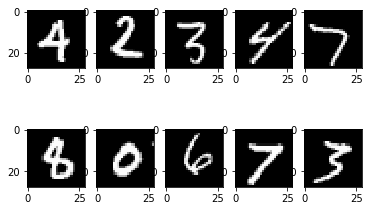

In [2]:
""" Load the MNIST dataset """
(X_train, y_train), (X_test, y_test) = mnist.load_data()

""" Let's view some of the sample images """
fig = plt.figure()
gs = gridspec.GridSpec(2, 5)

for i in range(10):
    """ Pick a random sample from the loaded set of images and display using matplotlib """
    sample_idx = np.random.randint(len(X_train))
    sample_img = X_train[sample_idx, :, :]
    
    fig.add_subplot(gs[i])
    plt.imshow(sample_img, cmap='gray')

fig.savefig('../fig/sample_images.png')
plt.show()

In [3]:
img_width = X_train.shape[1]
img_height = X_train.shape[2]

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_height, img_width)
    X_test = X_test.reshape(X_test.shape[0], 1, img_height, img_width)
    input_shape = (1, img_height, img_width)
else:
    X_train = X_train.reshape(X_train.shape[0], img_height, img_width, 1)
    X_test = X_test.reshape(X_test.shape[0], img_height, img_width, 1)
    input_shape = (img_height, img_width, 1)
    
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('Input shape: ', X_train.shape)
print(X_train.shape[0], 'train samples.')
print(X_test.shape[0], 'test samples.')

Input shape:  (60000, 28, 28, 1)
60000 train samples.
10000 test samples.


We want to be able to visualize the data in order to get a better understanding of what we are dealing with. I am going to use [t-SNE](https://lvdmaaten.github.io/tsne/) for dimensionality reduction. t-SNE reduces our high dimensional data into just 2 or 3 dimensions so that it can plotted in a graph. We have to use Python 2 kernel for t-SNE to work, though.

Visualizing training data using t-SNE...


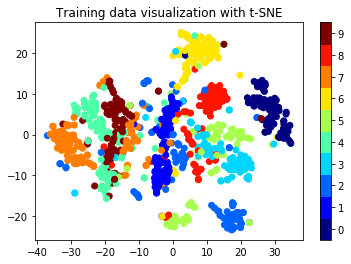

In [4]:
try:
    from tsne import bh_sne
except ImportError:
    print('ImportError: Data visualization (t-SNE) disabled!')

""" Data visualization using t-SNE """
if 'bh_sne' in sys.modules:
    print('Visualizing training data using t-SNE...')

    x_data = X_train.astype('float64')
    x_data = x_data.reshape((x_data.shape[0], -1))
    x_data = x_data[:1000]
    y_data = y_train[:1000]

    """ Perform t-SNE embedding """
    vis_data = bh_sne(x_data)

    """ Plot the data """
    vis_x = vis_data[:, 0]
    vis_y = vis_data[:, 1]

    fig = plt.figure()
    plt.scatter(vis_x, vis_y, c=y_data, cmap=plt.cm.get_cmap('jet', 10))
    plt.colorbar(ticks=range(10))
    plt.clim(-0.5, 9.5)
    plt.title('Training data visualization with t-SNE')
    plt.show()
    fig.savefig('../fig/t-sne_visualization.png')